In [14]:
import osmnx as ox
import networkx as nx
import datetime

Chiyoda, Tokyo, Japan
Chuo, Tokyo, Japan
Minato, Tokyo, Japan
Shinjuku, Tokyo, Japan
Bunkyo, Tokyo, Japan
Taito, Tokyo, Japan
Sumida, Tokyo, Japan
Koto, Tokyo, Japan
Shinagawa, Tokyo, Japan
Meguro, Tokyo, Japan
Ota, Tokyo, Japan
Setagaya, Tokyo, Japan
Shibuya, Tokyo, Japan
Nakano, Tokyo, Japan
Suginami, Tokyo, Japan
Kita, Tokyo, Japan
Arakawa, Tokyo, Japan
Itabashi, Tokyo, Japan
Nerima, Tokyo, Japan
Adachi, Tokyo, Japan
Katsushika, Tokyo, Japan
Edogawa, Tokyo, Japan


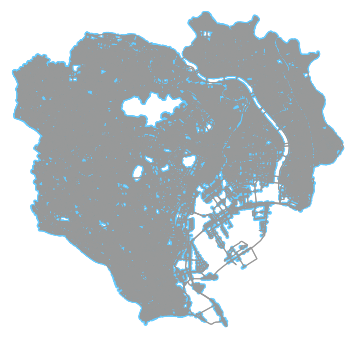

0:25:27.281552


In [2]:
starttime = datetime.datetime.now()

# G = ox.graph_from_place('Toshima, Tokyo, Japan', network_type='drive')

special_wards = ['Chiyoda', 'Chuo', 'Minato', 'Shinjuku', 'Bunkyo', 'Taito',
                 'Sumida', 'Koto', 'Shinagawa', 'Meguro', 'Ota', 'Setagaya',
                 'Shibuya', 'Nakano', 'Suginami', 'Kita', 'Arakawa',
                 'Itabashi', 'Nerima', 'Adachi', 'Katsushika', 'Edogawa']
places = []

count = 0

for ward in special_wards:
    place = ward + ', Tokyo, Japan'
    print(place)
    places.append(place)
    count += 1
    if count > 23:
        break
    
G = ox.graph_from_place(places, network_type='drive')

ox.plot_graph(ox.project_graph(G))
endtime = datetime.datetime.now()
print(str(endtime-starttime))

In [8]:
print((G.nodes[1304643087]))

{'y': 35.6791475, 'x': 139.6747365, 'osmid': 1304643087}


<class 'networkx.classes.graphviews.SubMultiDiGraph'>


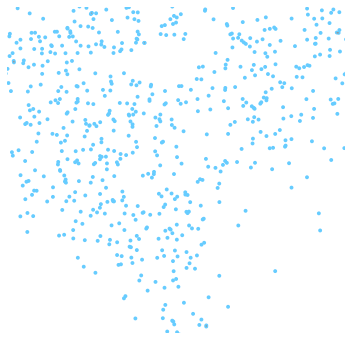

(<Figure size 436.025x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f0efa37ce10>)

In [4]:
import random
nodes = random.sample(G.nodes(), 800)
H = G.subgraph(nodes)
print(type(H))
ox.plot_graph(ox.project_graph(H))

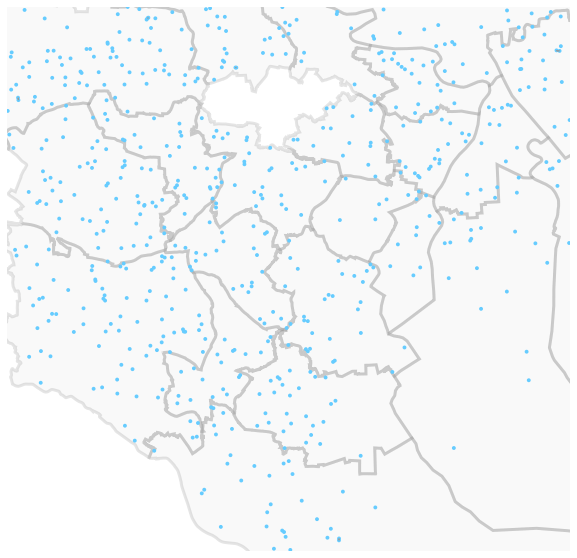

In [6]:
import matplotlib.pyplot as plt
from descartes import PolygonPatch
from shapely.geometry import Polygon, MultiPolygon

H = ox.project_graph(H)
fig, ax = ox.plot_graph(H, fig_height=10, show=False,close=False)
# plt.close()

gdf = ox.gdf_from_places(places)
gdf = ox.project_gdf(gdf)
for geometry in gdf['geometry'].tolist():
    if isinstance(geometry, (Polygon, MultiPolygon)):
        if isinstance(geometry,Polygon):
            geometry = MultiPolygon([geometry])
        for polygon in geometry:
            patch = PolygonPatch(polygon, fc='#cccccc',ec='k',linewidth=3,alpha=0.1,zorder=-1)
            ax.add_patch(patch)

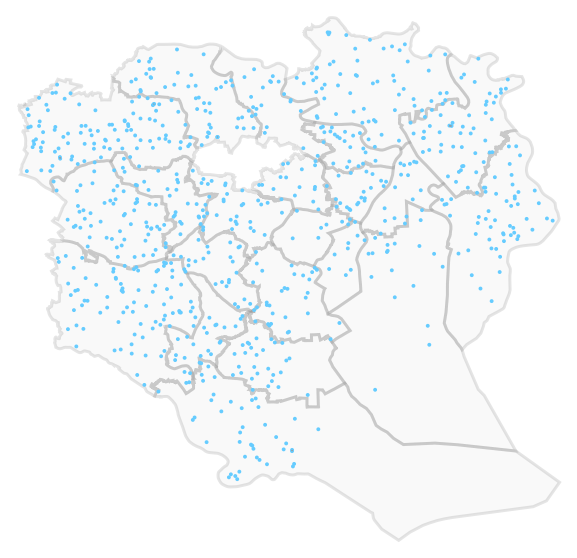

In [7]:
margin = 0.02 
west, south,east,north = gdf.unary_union.bounds
margin_ns = (north - south) * margin
margin_ew = (east - west) * margin
ax.set_ylim((south - margin_ns, north + margin_ns))
ax.set_xlim((west - margin_ew, east + margin_ew))
fig

In [22]:
print(len(G.nodes), len(G.edges))

165630 441093


In [45]:
print(len(G.nodes),len(G.edges))
G.to_undirected
print(G)
print(len(G.nodes),len(G.edges))

4319 10908
Shibuya, Tokyo, Japan
4319 10908


In [47]:
G.edges(1304643087)

OutMultiEdgeDataView([(1304643087, 1304352000), (1304643087, 896895996), (1304643087, 1304642554)])

In [3]:
H = G.subgraph([4512121124, 4512121125, 309051694, 2234122550, 252674360, 4512121149, 4512121150, 4512121151, 4512121152, 4512121153, 2299527487, 4512121155, 4512121156, 2299527489, 4512121158, 1083605322, 1083605325, 1083605335, 1074725207, 705708379, 1074725213, 1074725216, 1083605347, 1074725221, 252674406, 1074725229, 508461422, 508461427, 1083605366, 1304641916, 475758977, 1083605378, 1074725253, 1083605385, 1083605391, 1083605394, 1083605405, 1304641954, 2862866568, 256000430, 1304641967, 475759032, 1304641977, 2299527609, 309051836, 1304641980, 1304641999, 1074725333, 1304642015, 1074725361, 5199462903, 1304642039, 1074725369, 1304642070, 1304642071, 309051932, 1304642093, 1304642104, 1304642115, 475759174, 1074725446, 248136264, 2299527754, 252674643, 248136276, 1304642133, 444301910, 444301911, 1304642135, 444301913, 2299527768, 3796189794, 1522516586, 1074725489, 1304642164, 2397979255, 1074725507, 1304642181, 1074725513, 2299527818, 475759244, 2397979280, 1304642195, 1074725528, 1304642207, 1304642210, 1074725541, 1074725552, 1074725554, 475759282, 1074725555, 1074725571, 1074725575, 4339532490, 1074725579, 625558221, 1304642253, 1304642271, 2299527913, 2123727594, 2123727597, 1304642285, 1304642293, 2393522938, 1304642318, 1304642324, 252674855, 252674856, 1304642345, 1304642350, 330384175, 1304642362, 1304642365, 309052225, 1074725708, 1477919567, 475759450, 1304642395, 252674916, 2404975467, 1143784300, 1304642416, 1891009394, 1304642421, 1891009397, 1304642425, 1477919611, 4213654395, 1143784317, 1891009404, 4213654405, 1304642439, 4213654412, 1304642449, 1143784339, 1143784342, 841401246, 302318498, 1708884904, 1074725800, 1304642481, 1143784369, 597722036, 597722042, 597722044, 1074725821, 1304642494, 1304642495, 705708992, 1143784380, 1143784382, 1304642499, 1304642501, 1142997957, 1477919689, 2246607820, 1304642516, 1304642518, 2123727843, 1074725865, 1074725866, 252675052, 252675054, 1547027440, 444302327, 1304642551, 1304642554, 1304642566, 1304642570, 1304642573, 2246607888, 1477854237, 1304642590, 475759650, 1547027491, 1304642600, 1547027500, 508462133, 1074725942, 475759673, 4339500092, 1304642623, 1304642624, 1304642645, 1304642649, 252675164, 1304642653, 252675166, 252675167, 1477919843, 2123727973, 1477919848, 1304642667, 1503790188, 1304642671, 1074726002, 597689460, 597689467, 625558653, 1547027593, 1304642701, 2123728023, 597722265, 1304642714, 1304642720, 1304642722, 1304642730, 1304642731, 1304642732, 1304642742, 1304642746, 2214102203, 2214102207, 1304642770, 1304642776, 2123728096, 1304642785, 475759845, 508462311, 1547027689, 1304642798, 1304642803, 1304642805, 1477854455, 760366328, 760366330, 1304642817, 1304642826, 1304642828, 1304642830, 1304642837, 2123728155, 760366364, 1559971104, 760366383, 1074726193, 610813237, 610813238, 610813240, 1304642872, 610813247, 1304642881, 1304642882, 1074726216, 610813258, 568919372, 2123728205, 568919377, 1074726229, 1304642904, 1304642905, 1304642909, 1074726241, 1304642913, 1547027815, 2123728231, 1304642921, 1074726252, 1499530611, 573359476, 573359477, 1547027833, 1304642938, 1304642939, 2123728251, 1908508035, 1304642954, 2123728270, 573359503, 1304642967, 1908508055, 1304642969, 1908508060, 2123728297, 1304642986, 1304642992, 1304642994, 1304642997, 1304643009, 1304643010, 475760072, 1304643028, 1304643041, 252675555, 1304643048, 2123728365, 1304643054, 1304643066, 5158143493, 5158143494, 1304643081, 5158143499, 1304643087, 475760146, 695158298, 1304643099, 695158300, 1304643103, 1304643105, 695158305, 2405041702, 1304643110, 695158311, 695158313, 1125926442, 1304643115, 1762559532, 695158315, 695158310, 695158319, 695158320, 695158322, 1304643125, 1304643127, 289359416, 695158329, 695158330, 695158328, 2405041725, 695158335, 695158336, 695158337, 1762559555, 695158339, 695158340, 695158343, 1304643144, 573359689, 695158345, 573359691, 573359692, 573359693, 603899469, 695158344, 695158346, 1304643151, 2297808466, 1304643157, 1304643158, 1304643159, 1762559577, 475760223, 289359462, 1304643178, 1304643193, 1762559612, 2847803005, 2847803006, 1304643196, 1304643199, 2847803010, 1304643202, 1304643212, 1304643213, 1304643217, 475760298, 1304643248, 1304643250, 1304643254, 289359544, 1503790777, 1304643258, 289359551, 1304643268, 1304643271, 1304643282, 1304643285, 1304643297, 1304643305, 1304643307, 1108870893, 1108870895, 252675826, 252675828, 1108870901, 1108870902, 1108870903, 1108870904, 1304643316, 1108870906, 1304643324, 1108870911, 1304643327, 1108870914, 1108870915, 2123728643, 1304643338, 1108870925, 1108870926, 1108870930, 1813858066, 1304643346, 1304643357, 1108870944, 2123728678, 1559971626, 1304643375, 1108870960, 1304643386, 2123728701, 1304643391, 1304643393, 1304643395, 366856009, 2243069777, 1304643422, 1304643435, 4002006896])

unnamed


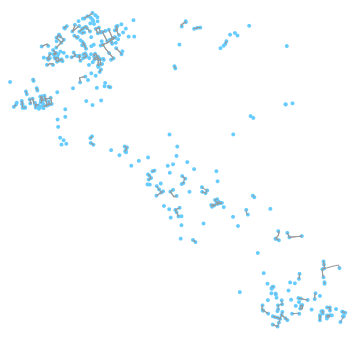

(<Figure size 444.783x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f0187e28cf8>)

In [4]:
print(H)
ox.plot_graph(ox.project_graph(H))

In [6]:
H.edges()

OutMultiEdgeDataView([(4512121124, 4512121125), (4512121125, 4512121124), (4512121125, 1304641916), (4512121125, 1304642624), (309051694, 309052225), (4512121149, 4512121150), (4512121150, 4512121149), (4512121150, 4512121152), (4512121150, 4512121151), (4512121152, 4512121150), (4512121152, 1304642293), (4512121152, 1304643202), (4512121153, 4512121155), (2299527489, 1074725229), (2299527489, 1074725942), (4512121155, 4512121153), (4512121156, 4512121158), (4512121151, 4512121150), (4512121158, 4512121155), (4512121158, 4512121156), (1083605322, 1083605394), (1074725207, 1074725213), (705708379, 1074725552), (705708379, 705708992), (1074725216, 1074726241), (1074725221, 1074725369), (1074725229, 2299527489), (508461422, 508461427), (508461427, 508461422), (1304641916, 4512121125), (1304641916, 1304642181), (1083605378, 1083605391), (1074725253, 2299527768), (1083605391, 1083605378), (1083605394, 1083605322), (1304641954, 1304643066), (475759032, 475758977), (475759032, 475759174), (22

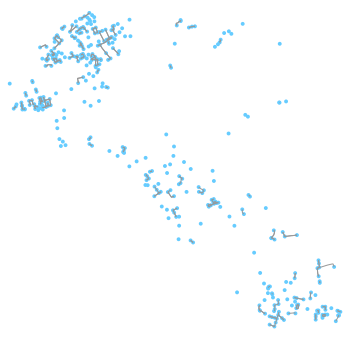

(<Figure size 553.848x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fe5cb218518>)

In [25]:
starttime = datetime.now()
origin_node = list(H.nodes())[0]
destination_node = list(H.nodes())[-1]
route = nx.shortest_path(G,origin_node, destination_node)
print(route)
endtime = datetime.now()
print(str(endtime-starttime))

[2048251905, 2048251887, 2048251896, 1311922179, 2048251883, 1747255789, 632466836, 632466835, 1998835628, 1274131257, 994952467, 994954009, 252100578, 286841674, 309295508, 309295507, 286841434, 309296992, 1815573660, 1996660609, 1996660616, 1105703093, 1989866080, 363635684, 1989855211, 1989855265, 305583530, 1988382371, 1988382384, 363514864, 363505589, 1262229576, 1262229582, 286841668, 349040313, 1986434095, 670228350, 349038005, 534581988, 587676121, 1295787218, 1295787226, 476549896, 286841786, 286841812, 2101147418, 2101140831, 1116897415, 2103148008, 1275074210, 286841824, 1750589590, 1310583180, 286841874, 1310342335, 1310342290, 2110614957, 252174740, 2110614927, 5190407114, 562825892, 562775195, 1928907427, 263988137, 5310679915, 263988157, 309603951, 309603969, 309604013, 309604026, 309608920, 309609006, 5553842163, 559445932, 484166486, 2569265248, 762939882, 762939884, 2394959047, 1956006439, 1960782877, 662426499, 1177185495, 1177184559, 1177185792, 718505064, 360600231

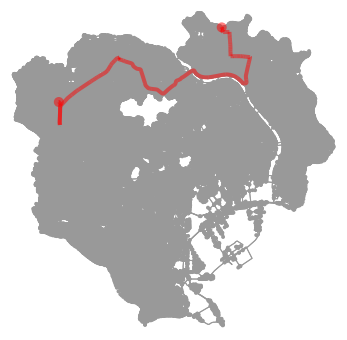

AttributeError: 'datetime.datetime' object has no attribute 'datetime'

In [21]:
import osmnx as ox, networkx as nx
import datetime
starttime = datetime.datetime.now()
route_map = ox.plot_graph_route(G, route)
endtime = datetime.datetime.now()
print(str(endtime-starttime))

In [195]:
import datetime
from shapely.geometry import Point
from scipy import spatial
import numpy as np
%matplotlib inline

starttime = datetime.datetime.now()

G = nx.Graph()

drm = '/home/ubuntu/Data/RoadNetwork/drmbaseroad.csv'

matrix = list()
node_index = dict()
index = 0

with open(drm, 'r') as f:
    f.readline()
    for line in f.readlines():
        tokens = line.strip('\n').split(',')
        eid = int(tokens[0])
        source = int(tokens[1])
        target = int(tokens[2])
        start_x = float(tokens[3])
        start_y = float(tokens[4])
        end_x = float(tokens[5])
        end_y = float(tokens[6])
        r_type = tokens[7]
        lane_num = int(tokens[8])
        length = float(tokens[9])
        
        if start_y >35 and start_y <36 and end_y >35 and end_y< 36 and start_x > 139 and start_x < 140 and end_x>139 and end_x<140:
            if source not in list(G.nodes):
                G.add_node(source, x=start_x,y=start_y, level='road')
                matrix.append([start_x, start_y])
                node_index[index] = source
                index += 1
                
            if target not in list(G.nodes):
                G.add_node(target, x=end_x,y=end_y, level='road')
                matrix.append([end_x, end_y])
                node_index[index] = target
                index += 1
                
            G.add_edge(source, target, road_type=r_type, length=length)

rail = '/home/ubuntu/Data/RailNetwork/railnetwork.csv'

kdtree = spatial.KDTree(matrix)
print(kdtree)

with open(rail, 'r') as f:
    f.readline()
    for line in f.readlines():
        tokens = line.strip('\n').split(',')
        eid = int(tokens[0])
        source = int(tokens[1])
        target = int(tokens[2])
        start_x = float(tokens[3])
        start_y = float(tokens[4])
        end_x = float(tokens[5])
        end_y = float(tokens[6])
        r_type = tokens[7]
        lane_num = int(tokens[8])
        length = float(tokens[9])
        
        if start_y >35 and start_y <36 and end_y >35 and end_y< 36 and start_x > 139 and start_x < 140 and end_x>139 and end_x<140:
            if source not in list(G.nodes):
                G.add_node(source, x=start_x, y=start_y, level='rail')
                nearest_node = node_index[kdtree.query([start_x, start_y])[1]]              
                G.add_edge(source, nearest_node, road_type='connect', length=0.1)
                
            if target not in list(G.nodes):
                G.add_node(target, x=end_x,y=end_y, level='rail')
                nearest_node = node_index[kdtree.query([end_x, end_y])[1]]
                G.add_edge(target, nearest_node, road_type='connect', length=0.1)                
                
            G.add_edge(source, target, road_type=r_type, length=length)

endtime = datetime.datetime.now()
print(str(endtime-starttime))
            
nx.write_graphml(G, "/home/ubuntu/Result/network/Tokyo.graphml")

# path = nx.shortest_path(G,'3022163','3022247','length')
#print(np.array(matrix))
#print(node_index)
# print(nx.dijkstra_path_length(G,'3022163','3022247','length'))

0:06:47.018204


In [196]:
H = nx.read_graphml("/home/ubuntu/Result/network/Tokyo.graphml")
print(H.edges)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [125]:
from scipy import spatial

import numpy as np

A = np.random.random((1000000,2))*100

pt = [6, 30]  

A[spatial.KDTree(A).query(pt)[1]]



array([ 5.95026863, 29.95041331])

In [95]:
istance,index = spatial.KDTree(A).query(pt)

A[index]


array([ 6.29054565, 16.71570456])